## Exploration 10. Create CIFAR-10 Image üì∏

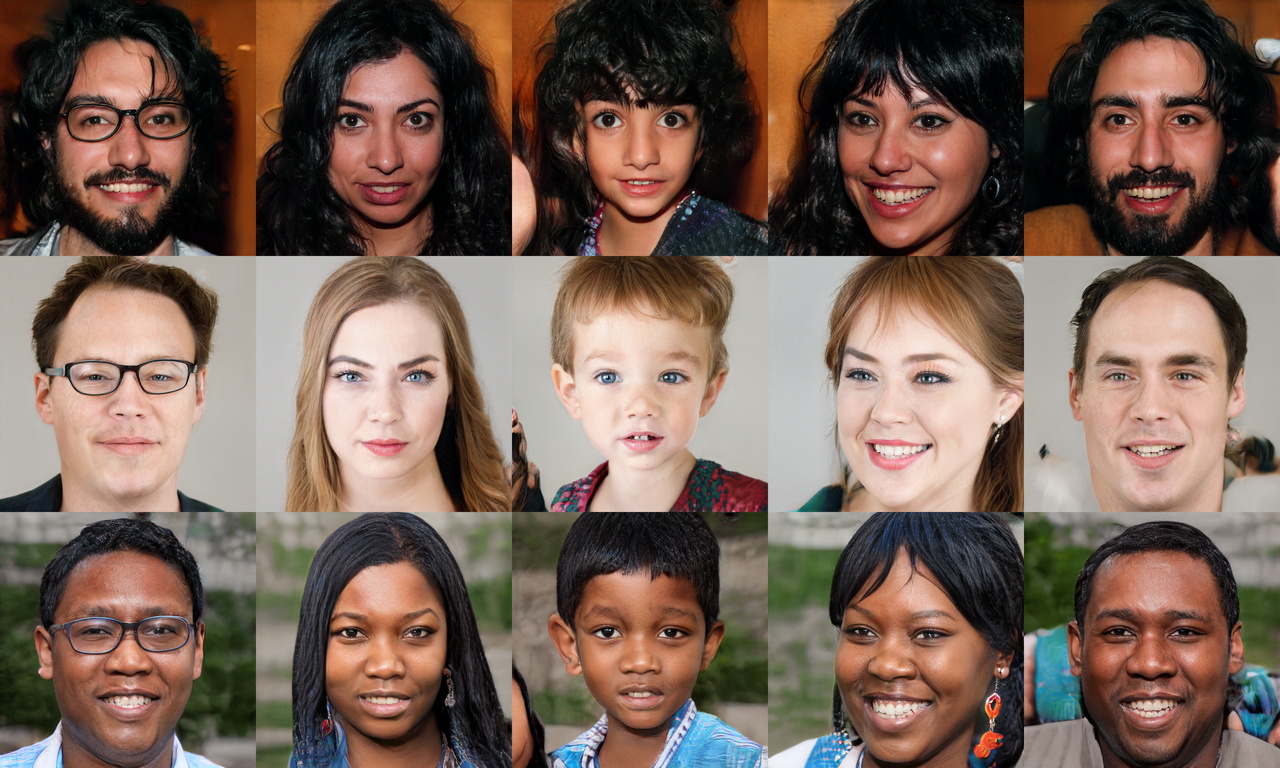
<center>[Img1] Image generated by Gan Model</center>

## Table of content

### 1. Introduction

* 1.1 What is GAN?
* 1.2 Why Gan?
* 1.3 What is DCGAN?

### 2. Experiment Environment Set-up

* 2.1 Import Libraries
* 2.2 Create Folders

### 3. Load and View Data

* 3.1 CIFAR-10 Dataset
* 3.2 Load Data
* 3.3 Data Normalization
* 3.4 Data Visualization
* 3.5 Dataset Preparation

### 4. Implementing the Generator Model

* 4.1 Function of Generator Model
* 4.2 Generator Model Summary
* 4.3 Check the Generator Model Output

### 5. Implementing the Discriminator Model

* 5.1 Function of Discriminator Model
* 5.2 Discriminator Model Summary
* 5.3 Check the Discriminator Model Output

### 6. Implementing Loss, Optimization Functions and Accuracy

* 6.1 Implementing Loss Function
  * 6.1.1 Generator Loss
  * 6.1.2 Discriminator Loss
* 6.2 Implementing Discriminator Accuracy
* 6.3 Implementing Optimizer Function

### 7. Implementing Detailed Training Process

* 7.1 Implementing `train_step` Function
* 7.2 Implementing `generate_and_save_images` Function
* 7.3 Implementing `draw_train_history` Function
* 7.4 Implementing `checkpoint`

### 8. Progress the Training Process

* 8.1 Train a Model
* 8.2 Check the Result
* 8.3 Conclusion

### 9. Improving the GAN Training Process

* 9.1 Increase Epochs
* 9.2 Only in Cat Class
  * 9.2.1 500 Epochs
  * 9.2.2 3,000 Epochs
  * 9.2.3 6,000 Epochs
  * 9.2.4 Modifying Parameters (500 Epochs)
  * 9.2.5 Modifying Parameters (3000 Epochs)
  * 9.2.6 Modifying the Generator Model (500 Epochs)
* 9.3 Training CIFAR10 Image

### 10. Retrospection

***

### 1. Introduction

### 1.1 What is GAN?

GANÏù¥ÎûÄ Î¨¥ÏóáÏù∏Í∞Ä? GANÏùÄ Generative Adversarial NetsÏù¥ÎùºÎäî ÎÖºÎ¨∏ÏùÑ ÌÜµÌï¥ ÎÇòÏò® Î™®Îç∏Î°ú ÏúÑÏôÄ Í∞ôÏù¥ ÏßÑÏßúÏôÄ ÎèôÏùºÌï¥ Î≥¥Ïù¥Îäî Ïù¥ÎØ∏ÏßÄÎ•º ÏÉùÏÑ±ÌïòÎäî Î™®Îç∏Ïù¥Îã§. 

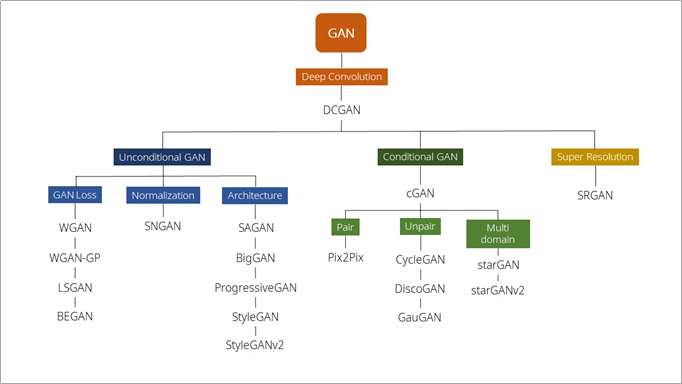
<center>[Img4] Taxnomoy of GAN</center>

* DCGAN : ÏñÄÎ•¥Ïø§Ïù¥ GANÏùÑ ÎÇ≥ÏïòÎã§Î©¥ FacebookÏùÄ DCGANÏùÑ ÌÜµÌï¥ Î™®Îì† ÌõÑÏÜçÏó∞Íµ¨Í∞Ä Ïù¥Ïñ¥Ïßà Ïàò ÏûàÎèÑÎ°ù ÌÇ§Ïö¥ Î™®Îç∏
* LSGAN : Í∏∞Ï°¥ GANÏóê Ï†ÅÏö©Îêú LossÏùò ÏàòÏãùÏùÑ Least Square lossÎ°ú Î∞îÍæ∏Ïñ¥ ÏÑ±Îä• Ìñ•ÏÉÅÏùÑ ÎèÑÎ™®Ìïú Î™®Îç∏
* PGGAN : Í∏∞Ï°¥ Î™®Îç∏Í≥º Îã¨Î¶¨ Ï†êÏßÑÏ†ÅÏúºÎ°ú ÌïôÏäµÌïòÏó¨ 1024x1024Ïùò Í≥†ÌôîÏßà Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±ÏùÑ Í∞ÄÎä•ÌïòÍ≤å Ìïú Î™®Îç∏
* SRGAN : GAN Î™®Îç∏Ïùò Ïù∏ÏßÄÏ†Å Ìï¥ÏÉÅÎèÑÎ•º ÎÜíÏó¨ Í≥†ÌôîÏßà Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±ÏùÑ Í∞ÄÎä•ÌïòÍ≤å Ìïú Î™®Îç∏
* CycleGAN : Ïó≠Ìï®Ïàò Í∞úÎÖêÍ≥º ÏàúÌôòÏùºÍ¥ÄÏÑ± ÏÜêÏã§ Ìï®ÏàòÎ•º Ïù¥Ïö©Ìï¥ ÌäπÏ†ï Ïù¥ÎØ∏ÏßÄÏùò ÌôîÌíçÏùÑ Îã§Î•∏ Ïù¥ÎØ∏ÏßÄÏóê Ï†ÅÏö©Ìï† Ïàò ÏûàÍ≤å Ìïú Î™®Îç∏
* StarGAN : Îã®Ïùº ÏÉùÏÑ±Ïûê/ÌåêÎ≥ÑÏûêÎ°ú Domain TransferÍ∞Ä Í∞ÄÎä•ÌïòÎèÑÎ°ù ÎßåÎì† Î™®Îç∏

### 1.2 Why Gan?

Ïó¨Îü¨ Ïù¥Ïú†Í∞Ä ÏûàÏßÄÎßå Í∑∏ Ï§ë Îã®Ïó∞ ÌïµÏã¨Ïù¥Îùº ÏÉùÍ∞ÅÎêòÎäî Í≤ÉÏùÄ Î∞îÎ°ú Í∏∞Ï°¥Ïùò ÏßÄÎèÑÌïôÏäµÏùò ÌïúÍ≥Ñ ÎïåÎ¨∏Ïù¥Îã§.
Í∏∞Ï°¥Ïùò ÏßÄÎèÑÌïôÏäµÏùò Í≤ΩÏö∞ Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÌïÑÏàòÏ†ÅÏúºÎ°ú ÏàòÎ∞òÎêúÎã§. ÌïòÏßÄÎßå Ïù¥Îü¨Ìïú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎßåÎìúÎäî Í≥ºÏ†ïÏóê ÎìúÎäî ÏãúÍ∞Ñ Îì±Ïùò ÎπÑÏö©Ïùò ÌïúÍ≥ÑÍ∞Ä ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ïñ¥Î†µÎã§Îäî Í≤ÉÏù¥Îã§. ÌïòÏßÄÎßå GANÏùÄ ÏßÄÎèÑÌïôÏäµÏóê ÏÇ¨Ïö©ÎêòÎäî ÎùºÎ≤® ÏóÜÏù¥ÎèÑ ÌïôÏäµ Í∞ÄÎä•Ìïú ÎπÑÏßÄÎèÑÌïôÏäµÏóê ÏÜçÌïòÎ©∞, Îç∞Ïù¥ÌÑ∞Î•º ÏßÅÏ†ë ÏÉùÏÑ±ÌïòÎäî ÌÅ∞ Ïû•Ï†êÏùÑ Í∞ÄÏßÑÎã§. Îî∞ÎùºÏÑú GANÏùò Í≤ΩÏö∞ ÎπÑÏßÄÎèÑÌïôÏäµÏùò ÏÑ†ÎëêÏ£ºÏûêÎ°ú Î∂àÎ¶¨Í≥†ÎèÑ ÏûàÏúºÎ©∞, Î™áÎ™áÏùò ÏÇ¨ÎûåÎì§ÏùÄ ÎπÑÏßÄÎèÑÌïôÏäµÏù¥ ÎçîÏö± Í∞ÅÍ¥ëÎ∞õÎäî Í∏∞Ïà†Ïù¥ Îê† Í≤ÉÏù¥Îùº Ï†ÑÎßùÌïúÎã§.Í∑∏ÎûòÏÑú ÏïÑÏßÅÍπåÏßÄ GANÏù¥ÎùºÍ≥† ÌïòÎäî Î™®Îç∏Ïù¥ Í∞ÅÍ¥ëÎ∞õÍ≥† ÏûàÍ≥† ÌõÑÏÜç Ïó∞Íµ¨Îì§Ïù¥ Ïù¥Ïñ¥ÏßÄÍ≥† ÏûàÎäî Í≤ÉÏù¥Îã§.

### 1.3 What is DCGAN (Deep Convolutional GAN)?

Í∏∞Ï°¥Ïùò GANÏúºÎ°úÎäî ÏÑ±Îä•Ïù¥ Ïûò ÎÇòÏò§ÏßÄ ÏïäÏïòÎäîÎç∞ Í∑∏ Ïù¥Ïú†Îäî Í∞ÑÎã®ÌïòÍ≤å Fully-Connected ÎêòÏñ¥ ÏûàÎäî Íµ¨Ï°∞Ïù¥Í∏∞ ÎïåÎ¨∏Ïù¥Îã§. Îî∞ÎùºÏÑú FacebookÏùÄ DCGANÏù¥ÎùºÍ≥† ÌïòÎäî Î™®Îç∏ÏùÑ ÎÇ¥ÎÜìÏúºÎ©∞ **Fully-Connected Íµ¨Ï°∞Î•º CNNÏúºÎ°ú Î∞îÍæ∏Ïñ¥ GANÏùò ÏÑ±Îä• Ìñ•ÏÉÅÏùÑ ÎèÑÎ™®Ìïú Í≤É**Ïù¥ ÌïµÏã¨Ïù¥Îùº Ìï† Ïàò ÏûàÎã§.

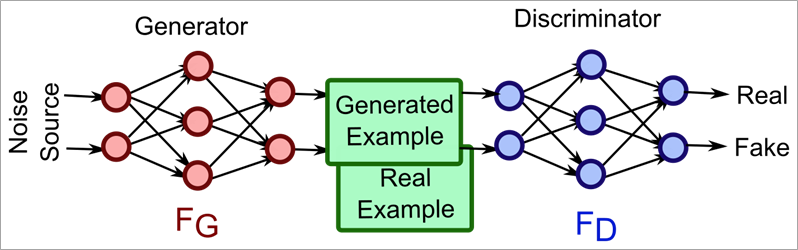
<center>[Img4] Structure of Original GAN</center>

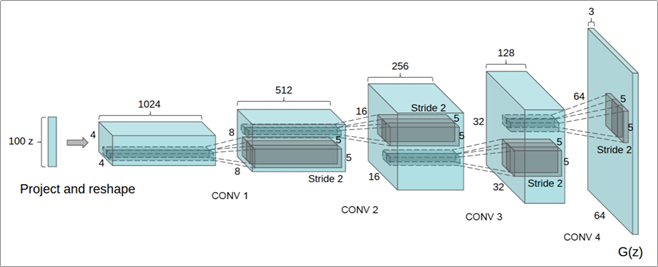
<center>[Img5] Structure of DCGAN (Generator)</center>

DCGANÏùÄ ÏÉùÏÑ±Ïûê Î™®Îç∏Ïóê Transposed Convolutional NetworkÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Up-SamplingÌïòÎäîÎç∞ ÏÇ¨Ïö©ÌïòÏòÄÎã§. ÏúÑ Í∑∏Î¶ºÏóêÎäî ÎÇòÏôÄ ÏûàÏßÄ ÏïäÏßÄÎßå ÌåêÎ≥ÑÏûê Î™®Îç∏ÏóêÎäî Îã®Ïàú Convolutional NetworkÎ•º ÏÇ¨Ïö©Ìïú Í≤ÉÏù¥ ÌäπÏßïÏù¥Îã§.

### 2. Experiment Environment Set-up

### 2.1 Import Libraries

In [1]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

### 2.2 Create Folders

In [2]:
os.makedirs(os.getenv('HOME')+"/aiffel/dcgan_newimage/result_cifar10/training_history", exist_ok=True)
os.makedirs(os.getenv('HOME')+"/aiffel/dcgan_newimage/result_cifar10/generated_samples", exist_ok=True)
os.makedirs(os.getenv('HOME')+"/aiffel/dcgan_newimage/result_cifar10/training_checkpoints", exist_ok=True)

### 3. Load and View Data

### 3.1 CIFAR-10 Dataset

* The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. * There are 50000 training images and 10000 test images.
* The dataset is divided into five training batches and one test batch, each with 10000 images.
* The test batch contains exactly 1000 randomly-selected images from each class.
* The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.
* These are the classes in the dataset:airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
* The classes are completely mutually exclusive. i.e. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

### 3.2 Load Data

* Î∂ÑÎ•ò Î¨∏Ï†úÏóêÏÑúÏôÄ Îã¨Î¶¨, **Í∞Å Ïù¥ÎØ∏ÏßÄÍ∞Ä Ïñ¥Îñ§ Ïπ¥ÌÖåÍ≥†Î¶¨Ïù∏ÏßÄ ÎÇòÌÉÄÎÇ¥Ï£ºÎäî ÎùºÎ≤®Ïù¥ ÌïÑÏöî ÏóÜÎã§.**
* Ï¶â, Î∂ÑÎ•ò Î¨∏Ï†úÎ•º ÌíÄÏóàÏùÑ Îïå ÌïÑÏöîÌñàÎçò y_train, y_testÏóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞Î•º Ïì∞ÏßÄ ÏïäÎäî Í≤ÉÏù¥Îã§.
* Í∑∏Î†áÍ∏∞ ÎïåÎ¨∏Ïóê ÏΩîÎìúÏóêÏÑú `_` (Ïñ∏ÎçîÏä§ÏΩîÏñ¥)Î°ú Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Îì§ÏùÄ Î¨¥ÏãúÌïòÎèÑÎ°ù ÌïúÎã§.

In [3]:
cifar10 = tf.keras.datasets.cifar10
(train_x, _), (test_x, _) = cifar10.load_data()
train_x.shape

(50000, 32, 32, 3)

In [4]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


### 3.3 Data Normalization

* CIFAR-10ÏùÄ 32x32 ÌîΩÏÖÄÏùò Ïù¥ÎØ∏ÏßÄÎ°ú, Í∞Å ÌîΩÏÖÄÏùÄ 0~255 ÏÇ¨Ïù¥Ïùò Ï†ïÏà´Í∞íÏùÑ Í∞ÄÏßÑÎã§.
* Í∞Å ÌîΩÏÖÄÏùÑ -1, 1Î°ú Ï†ïÍ∑úÌôîÏãúÏºúÏÑú ÏÇ¨Ïö©Ìï† ÏòàÏ†ïÏù¥ÎØÄÎ°ú, Ï§ëÍ∞ÑÍ∞íÏùÑ 0ÏúºÎ°ú ÎßûÏ∂∞Ï£ºÍ∏∞ ÏúÑÌï¥ 127.5Î•º Î∫Ä ÌõÑ 127.5Î°ú ÎÇòÎà†Ï§ÄÎã§.

In [5]:
train_x = (train_x - 127.5) / 127.5 # Ïù¥ÎØ∏ÏßÄÎ•º [-1, 1]Î°ú Ï†ïÍ∑úÌôî

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [6]:
train_x.shape

(50000, 32, 32, 3)

* ÏïûÏÑú ÏùΩÏóàÎçò Dataset Ï†ïÎ≥¥ÏóêÏÑú ÌôïÏù∏ÌñàÎìØÏù¥, train Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÎäî 5Îßå Ïû•Ïùò Ïù¥ÎØ∏ÏßÄÍ∞Ä Îì§Ïñ¥ÏûàÎã§. Îòê, Ïù¥ÎØ∏ÏßÄÏùò ÏÇ¨Ïù¥Ï¶àÎäî 32x32ÏûÑÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
* ÎßàÏßÄÎßâ `3`ÏùÄ Ï±ÑÎÑê ÏàòÏóê ÎåÄÌïú Ï∞®ÏõêÏù¥Îã§. CIFAR-10ÏùÄ Ïª¨Îü¨ Ïù¥ÎØ∏ÏßÄÏù¥ÎØÄÎ°ú `3 (R, G, B ÏÑ∏ Í∞úÏùò Ï±ÑÎÑê)`Ïù¥ Ï∂úÎ†•ÎêúÎã§.

### 3.4 Data Visualization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


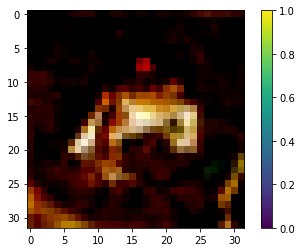

In [7]:
# Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄ Í∫ºÎÇ¥ÏÑú ÌôïÏù∏Ìï¥Î≥¥Í∏∞(ÏãúÍ∞ÅÌôî)

plt.imshow(train_x[0].reshape(32, 32, 3))
plt.colorbar()
plt.show()

* Î¨¥Ïä® ÏÇ¨ÏßÑÏù∏ÏßÄ Î™®Î•¥Í≤†Îã§. ÏïûÏóêÏÑú ÏßÑÌñâÌïú Ïù¥ÎØ∏ÏßÄ Ï†ïÍ∑úÌôî ÎïåÎ¨∏Ïù∏ ÎìØÌïòÎã§.
* `plt.colorbar()` Î•º Ïù¥Ïö©Ìï¥ Ïò§Î•∏Ï™ΩÏóê Í∞Å ÌîΩÏÖÄÏùò Í∞íÍ≥º Í∑∏Ïóê Îî∞Î•∏ ÏÉâÎèÑ ÌôïÏù∏Ìï¥ Î≥¥ÏïòÎã§.
* ÌîΩÏÖÄÏóêÎäî Ï†ïÍ∑úÌôî Ìï¥Ï§Ä ÎåÄÎ°ú -1 ~ 1 ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ Í∞ÄÏßÄÍ≥†, -1Ïù¥ Í∞ÄÏû• Ïñ¥ÎëêÏö¥ Í≤ÄÏùÄÏÉâ, 1Ïù¥ Í∞ÄÏû• Î∞ùÏùÄ Ìù∞ÏÉâÏùÑ Îù§Îã§Í≥† ÌëúÏãúÎêòÏñ¥ ÏûàÎã§.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

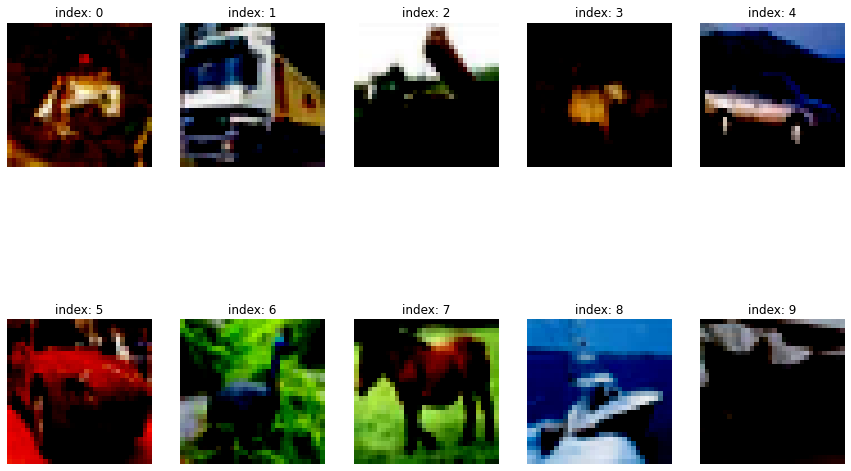

In [8]:
# Ïù¥ÎØ∏ÏßÄ Ïó¥ Í∞ú Ï†ïÎèÑ Ìïú Î≤àÏóê ÎùÑÏõåÎ≥¥Í∏∞

plt.figure(figsize=(15, 10))  # Ïù¥ÎØ∏ÏßÄÏùò Ï†ÑÏ≤¥ ÌîÑÎ†àÏûÑÏùò ÌÅ¨Í∏∞ Í≤∞Ï†ï

for i in range(10):
    plt.subplot(2, 5, i+1)  # Ïó¨Îü¨ Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ•º Ìïú Î≤àÏóê ÎùÑÏö∞Í∏∞(10Í∞úÏùò Ïù¥ÎØ∏ÏßÄ, 2x5Ïùò Î∞∞Ïó¥ ÌòïÌÉú)
    plt.imshow(train_x[i].reshape(32, 32, 3))
    plt.title(f'index: {i}')  # Ïù¥ÎØ∏ÏßÄÏóê Ï†úÎ™©ÏúºÎ°ú ÎùºÎ≤® Í∞í
    plt.axis('off')  # Î∂àÌïÑÏöîÌïú Ï∂ï ÏßÄÏö∞Í∏∞
plt.show()

### 3.5 Dataset Preparation

In [9]:
BUFFER_SIZE = 50000  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÏÑûÍ∏∞ ÏúÑÌï¥ 50,000ÏúºÎ°ú ÏÑ§Ï†ï
BATCH_SIZE = 256  # Î™®Îç∏Ïù¥ Ìïú Î≤àÏóê ÌïôÏäµÌï† Îç∞Ïù¥ÌÑ∞Ïùò Ïñë

In [10]:
# Ï†ïÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞Î•º Í≥ß Î™®Îç∏Ïóê ÎÑ£Ïñ¥ÏÑú ÌïôÏäµÏãúÏºúÏïº ÌïòÎãà, Ìé∏ÌïòÍ≤å ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù ÌÖêÏÑúÌîåÎ°úÏö∞Ïùò DatasetÏùÑ Ïù¥Ïö©Ìï¥ Ï§ÄÎπÑ
# shuffle() Ìï®ÏàòÍ∞Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ïûò ÏÑûÏñ¥ÏÑú Î™®Îç∏Ïóê ÎÑ£Ïñ¥Ï§ÄÎã§.
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

### 4. Implementing the Generator Model

### 4.1 Function of Generator Model

In [11]:
# make_generator_modelÏù¥ÎùºÎäî Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ÏÑú Ïñ∏Ï†úÎì† ÏÉùÏÑ±ÏûêÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏûàÎèÑÎ°ù ÌïúÎã§.
def make_generator_model():

    # Start
    # tf.keras.Sequential()Î°ú Î™®Îç∏ÏùÑ ÏãúÏûëÌïú ÌõÑ Î†àÏù¥Ïñ¥Î•º ÏåìÎäîÎã§.
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((8, 8, 256)))

    # Third: Conv2DTranspose layer
    # Conv2DTranspose Ï∏µÏùÄ ÏùºÎ∞òÏ†ÅÏù∏ Conv2DÏôÄ Î∞òÎåÄÎ°ú Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÎ•º ÎÑìÌòÄÏ£ºÎäî Ï∏µ
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

* Î†àÏù¥Ïñ¥Ïùò ÏÇ¨Ïù¥ÏÇ¨Ïù¥Ïóê ÌäπÏ†ï Ï∏µÎì§Ïù¥ Î∞òÎ≥µÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
* `BatchNormalization` Î†àÏù¥Ïñ¥ : Ïã†Í≤ΩÎßùÏùò Í∞ÄÏ§ëÏπòÍ∞Ä Ìè≠Î∞úÌïòÏßÄ ÏïäÎèÑÎ°ù Í∞ÄÏ§ëÏπò Í∞íÏùÑ Ï†ïÍ∑úÌôî
* Ï§ëÍ∞ÑÏ∏µÎì§Ïùò ÌôúÏÑ±Ìôî Ìï®ÏàòÎäî Î™®Îëê `LeakyReLU` ÏÇ¨Ïö©
* -1 ~ 1 Ïù¥ÎÇ¥Ïùò Í∞íÏúºÎ°ú ÌîΩÏÖÄ Í∞íÏùÑ Ï†ïÍ∑úÌôîÏãúÏº∞Îçò Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º ÎèôÏùºÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ ÎßàÏßÄÎßâ Ï∏µÏóêÎäî ÌôúÏÑ±Ìôî Ìï®ÏàòÎ°ú `tanh` ÏÇ¨Ïö© 
* Î™®Îç∏ÏùÄ ÏûÖÎ†•Í∞íÏúºÎ°ú (batch_size, 100) ÌòïÏÉÅÏùò ÎÖ∏Ïù¥Ï¶à Î≤°ÌÑ∞Î•º Î∞õÎäîÎã§.
* ÏûÖÎ†•Îêú (batch_size, 100) Î≤°ÌÑ∞Îäî 8x8x256=16384Í∞úÏùò ÎÖ∏ÎìúÎ•º Í∞ÄÏßÑ Ï≤´ Î≤àÏß∏ Dense Î†àÏù¥Ïñ¥Î•º Í±∞ÏπòÎ©∞, (batch_size, 16384) ÌòïÏÉÅÏùò Î≤°ÌÑ∞Í∞Ä ÎêúÎã§.
* Ï≤´ Î≤àÏß∏ Î†àÏù¥Ïñ¥Î•º ÏßÄÎÇú ÌõÑ Î≤°ÌÑ∞Îäî Reshape Î†àÏù¥Ïñ¥Î•º ÏßÄÎÇòÍ≤å ÎêúÎã§.
* Ïù¥Îäî Ïù¥ÌõÑÏùò LayerÏóêÏÑú Convolutional Ïó∞ÏÇ∞ÏùÑ Ìï† Ïàò ÏûàÎèÑÎ°ù 1Ï∞®Ïõê Î≤°ÌÑ∞Î•º (8, 8, 256) ÌòïÏÉÅÏùò 3Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÏãúÌÇ§Îäî ÏûëÏóÖÏù¥Îã§.

### 4.2 Generator Model Summary

In [12]:
# generatorÎùºÎäî Î≥ÄÏàòÎ°ú ÏÉùÏÑ±ÌïòÍ≥†, Î™®Îç∏ ÏÑ∏Î∂Ä ÎÇ¥Ïö©Ïù∏ summary Ï∂úÎ†•
generator = make_generator_model()
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             1638400   
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16384)             0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 128)         0

### 4.3 Check the Generator Model Output

* `noise = tf.random.normal([1, 100])`Î°ú ÏÉùÏÑ±Îêú ÎûúÎç§ ÎÖ∏Ïù¥Ï¶àÎ•º ÏûÖÎ†•ÏúºÎ°ú ÌïòÏó¨ Î∞©Í∏à Íµ¨ÌòÑÌïú ÏÉùÏÑ±ÏûêÎ°ú ÎûúÎç§ Ïù¥ÎØ∏ÏßÄÎ•º ÏÉùÏÑ±ÌïúÎã§.
* ÏÉùÏÑ±Îêú ÎûúÎç§ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏÉùÏÑ±Ïûê Ï∂úÎ†• Í∑úÍ≤©Ïóê Ïûò ÎßûÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥∏Îã§.

In [13]:
# shape=(1, 100)Ïùò ÌòïÏÉÅÏùÑ Í∞ÄÏßÄÎäî ÎûúÎç§ ÎÖ∏Ïù¥Ï¶à Î≤°ÌÑ∞Î•º ÏÉùÏÑ±Ìï¥ÏÑú Í≤∞Í≥ºÎ¨ºÏùÑ ÌïúÎ≤à ÎßåÎì§Ïñ¥ Î≥∏Îã§.
# ÏïÑÏßÅ Î™®Îç∏Ïù¥ ÌïôÏäµÎêòÏßÄ ÏïäÏïòÏúºÎØÄÎ°ú Í≤∞Í≥ºÎ¨ºÎèÑ ÌÅ∞ ÏùòÎØ∏Í∞Ä ÏûàÏßÄÎäî ÏïäÏùÑ Í≤É
# tf.random.normalÏùÑ Ïù¥Ïö©ÌïòÎ©¥ Í∞ÄÏö∞ÏãúÏïà Î∂ÑÌè¨ÏóêÏÑú ÎΩëÏïÑÎÇ∏ ÎûúÎç§ Î≤°ÌÑ∞Î°ú Ïù¥Î£®Ïñ¥ÏßÑ ÎÖ∏Ïù¥Ï¶à Î≤°ÌÑ∞Î•º ÎßåÎì§ Ïàò ÏûàÎã§.

noise = tf.random.normal([1, 100])

In [14]:
# ÏßÄÍ∏àÏùÄ ÌïôÏäµÌïòÎäî Ï§ëÏù¥ ÏïÑÎãàÎØÄÎ°ú training=False
# Batch Normalization Î†àÏù¥Ïñ¥Îäî ÌõàÎ†® ÏãúÍ∏∞ÏôÄ Ï∂îÎ°†(infernce) ÏãúÍ∏∞Ïùò ÌñâÎèôÏù¥ Îã§Î•¥Í∏∞ ÎïåÎ¨∏Ïóê 
# training=FalseÏùÑ Ï£ºÏñ¥Ïïº Ïò¨Î∞îÎ•∏ Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÎã§.

generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 32, 32, 3])

* [1, 32, 32, 3]ÏÇ¨Ïù¥Ï¶àÏùò Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏÉùÏÑ±ÎêòÏóàÎã§.
* Ï≤´ Î≤àÏß∏ 1ÏùÄ 1Í∞ú(batch_size=1)ÎùºÎäî Îúª, Í∑∏ Îí§Î°úÎäî (32, 32, 3) ÏÇ¨Ïù¥Ï¶à Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏÉùÏÑ±ÎêòÏóàÎã§Îäî ÎúªÏù¥Îã§.

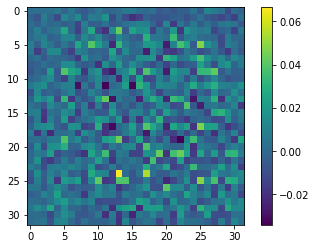

In [15]:
# ÏÉùÏÑ±Îêú Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî
# matplotlib ÎùºÏù¥Î∏åÎü¨Î¶¨Îäî 2Ï∞®Ïõê Ïù¥ÎØ∏ÏßÄÎßå Î≥¥Ïó¨Ï§Ñ Ïàò ÏûàÎã§.
# 0Î≤àÏß∏ÏôÄ 3Î≤àÏß∏ Ï∂ïÏùò Ïù∏Îç±Ïä§Î•º 0ÏúºÎ°ú ÏÑ§Ï†ïÌï¥ÏÑú (32, 32) shapeÏùò Ïù¥ÎØ∏ÏßÄÎ•º Í∫ºÎÇº Ïàò ÏûàÎèÑÎ°ù ÌïúÎã§.

plt.imshow(generated_image[0, :, :, 0])
plt.colorbar()
plt.show()

* -1Í≥º 1 ÏÇ¨Ïù¥Ïùò Í∞íÏóêÏÑú Ï†ÅÎãπÌûà Ïûò ÏÉùÏÑ±Îêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

### 5. Implementing the Discriminator Model

* (32, 32, 3)Ïùò Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÏïÑ 1dimÏùÑ ÌåêÎ≥ÑÍ≤∞Í≥ºÎ•º Ï∂úÎ†•ÌïòÎäî ÌåêÎ≥ÑÏûê Î™®Îç∏ Íµ¨ÌòÑ Ìï®ÏàòÎ•º ÏûëÏÑ±Ìï¥ Î¥ÖÏãúÎã§.
* ÏúÑ STEP 2ÏóêÏÑú ÏÉùÏÑ±Ìïú ÎûúÎç§ Ïù¥ÎØ∏ÏßÄÎ•º ÌåêÎ≥ÑÏûê Î™®Îç∏Ïù¥ ÌåêÎ≥ÑÌïú Í≤∞Í≥ºÍ∞íÏùÑ ÌôïÏù∏Ìï¥ Î¥ÖÏãúÎã§.

* ÌåêÎ≥ÑÏûêÎäî Í∞ÄÏßú Ïù¥ÎØ∏ÏßÄÏôÄ ÏßÑÏßú Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•Î∞õÏúºÎ©¥ Í∞Å Ïù¥ÎØ∏ÏßÄ Î≥ÑÎ°ú 'ÏßÑÏßúÎùºÍ≥† ÌåêÎã®ÌïòÎäî Ï†ïÎèÑ'Í∞íÏùÑ Ï∂úÎ†•Ìï¥Ïïº ÌïúÎã§.
* Í∑∏Î†áÎã§Î©¥ ÏûÖÎ†•ÏùÄ (32, 32, 3) ÌÅ¨Í∏∞Ïùò Ïù¥ÎØ∏ÏßÄÍ∞Ä, Ï∂úÎ†•ÏùÄ Îã® ÌïòÎÇòÏùò Ïà´Ïûê(ÏßÑÏßúÎùºÍ≥† ÌåêÎã®ÌïòÎäî Ï†ïÎèÑ)Í∞Ä Îê† Í≤ÉÏù¥Îã§.

### 5.1 Function of Discriminator Model

In [16]:
# ÌåêÎ≥ÑÏûê ÎòêÌïú make_discriminator_model Ìï®ÏàòÎ°ú Íµ¨ÌòÑ
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

* ÌåêÎ≥ÑÏûêÎäî `Conv2D` Ï∏µÏúºÎ°ú Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º Ï†êÏ†ê Ï§ÑÏó¨ÎÇòÍ∞ÑÎã§.
* Ï≤´ Î≤àÏß∏ Conv2D Ï∏µÏóêÏÑú ÏûÖÎ†•Îêú `[32, 32, 3]` ÏÇ¨Ïù¥Ï¶àÏùò Ïù¥ÎØ∏ÏßÄÎäî Îã§Ïùå Ï∏µÏùÑ Í±∞ÏπòÎ©∞ `(32, 32, 3) ‚Üí (16, 16, 64) ‚Üí (8, 8, 128)`ÍπåÏßÄ Ï§ÑÏñ¥Îì§Í≤å ÎêúÎã§.
* ÎßàÏßÄÎßâÏóêÎäî `Flatten` Ï∏µÏùÑ ÏÇ¨Ïö©Ìï¥ 3Ï∞®Ïõê Ïù¥ÎØ∏ÏßÄÎ•º 1Ï∞®ÏõêÏúºÎ°ú Ï≠â Ìé¥ÏÑú 8x8x128=8192, Ï¶â (1, 8192) ÌòïÏÉÅÏùò Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌïúÎã§. 
* Ïù¥Îäî ÏÉùÏÑ±ÏûêÏùò `Reshape` Ï∏µÏóêÏÑú 1Ï∞®Ïõê Î≤°ÌÑ∞Î•º 3Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôòÌñàÎçò Í≤ÉÍ≥º Ï†ïÌôïÌûà Î∞òÎåÄ Ïó≠Ìï†ÏùÑ ÌïúÎã§. 
* 1Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌïú ÌõÑÏóêÎäî ÎßàÏßÄÎßâ Dense LayerÎ•º Í±∞Ï≥ê Îã® ÌïòÎÇòÏùò Í∞íÏùÑ Ï∂úÎ†•ÌïòÍ≤å ÎêúÎã§.

### 5.2 Discriminator Model Summary

In [17]:
# ÌåêÎ≥Ñ Î™®Îç∏ÏùÑ discriminatorÎùºÎäî Î≥ÄÏàò Ïù¥Î¶ÑÏúºÎ°ú ÏÉùÏÑ±
# Î™®Îç∏ ÏÑ∏Î∂Ä ÎÇ¥Ïö©Ïù∏ summaryÎ•º Ï∂úÎ†•

discriminator = make_discriminator_model()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)             

### 5.3 Check the Discriminator Model Output

In [18]:
# ÌåêÎ≥ÑÏûêÏóê ÏúÑÏóêÏÑú ÏÉùÏÑ±ÌñàÎçò Í∞ÄÏßú Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•

decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00079002]], dtype=float32)>

* ÌÖêÏÑúÌîåÎ°úÏö∞Ïùò ÌÖêÏÑú ÌòïÌÉúÎ°ú Ï∂úÎ†•ÎêúÎã§.
* ÏïÑÏßÅÏùÄ ÏïÑÎ¨¥Îü∞ ÏùòÎØ∏Í∞Ä ÏóÜÎäî Í∞íÏùº Í≤ÉÏù¥Îã§.

### 6. Implementing Loss, Optimization Functions and Accuracy

* Real ImageÏóê ÎåÄÌïú ÎùºÎ≤®ÏùÑ 1, Fake ImageÏóê ÎåÄÌïú ÎùºÎ≤®ÏùÑ 0ÏúºÎ°ú ÎëêÏóàÏùÑ Îïå, Í∞ÅÍ∞ÅÏùò ÏÜêÏã§Ìï®ÏàòÎ•º Ïù¥Ïö©Ìï¥ Ï†ïÎüâÏ†ÅÏúºÎ°ú Îã¨ÏÑ±Ìï¥Ïïº ÌïòÎäî Î™©ÌëúÌïòÎäî Í≤∞Í≥ºÎäî Îã§ÏùåÍ≥º Í∞ôÎã§. 
  * ÏÉùÏÑ±Ïûê : ÌåêÎ≥ÑÏûêÍ∞Ä Fake ImageÏóê ÎåÄÌï¥ ÌåêÎ≥ÑÌïú Í∞í, Ï¶â `D(fake_image)` Í∞íÏù¥ 1Ïóê Í∞ÄÍπåÏõåÏßÄÎäî Í≤É
  * ÌåêÎ≥ÑÏûê : Real Image ÌåêÎ≥ÑÍ∞í, Ï¶â `D(real_image)`Îäî `1`Ïóê, Fake Image ÌåêÎ≥ÑÍ∞í, Ï¶â `D(fake_image)`Îäî `0`Ïóê Í∞ÄÍπåÏõåÏßÄÎäî Í≤É
* Í≤∞Íµ≠ ÏÉùÏÑ±ÏûêÎì† Íµ¨Î∂ÑÏûêÎì†, Í≤∞Íµ≠ ÏÜêÏã§Ìï®ÏàòÏóê Îì§Ïñ¥Í∞ÄÎäî Í∞íÏùÄ Î™®Îëê ÌåêÎ≥ÑÏûêÏùò ÌåêÎ≥ÑÍ∞íÏù¥ ÎêúÎã§.

* ÍµêÏ∞® ÏóîÌä∏Î°úÌîºÎ•º Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌï¥ ÏûÖÎ†•Ìï† Í∞íÏùÄ ÌåêÎ≥ÑÏûêÍ∞Ä ÌåêÎ≥ÑÌïú Í∞íÏù¥Îã§. 
* ÌåêÎ≥ÑÏûê Î™®Îç∏Ïùò Îß® ÎßàÏßÄÎßâ LayerÏóêÎäî Í∞íÏùÑ Ï†ïÍ∑úÌôîÏãúÌÇ§Îäî sigmoidÎÇò tanh Ìï®ÏàòÏôÄ Í∞ôÏùÄ ÌôúÏÑ±Ìôî Ìï®ÏàòÍ∞Ä ÏóÜÏóàÎã§. 
* Íµ¨Î∂ÑÏûêÍ∞Ä Ï∂úÎ†•ÌïòÎäî Í∞íÏùÄ Î≤îÏúÑÍ∞Ä Ï†ïÌï¥ÏßÄÏßÄ ÏïäÏïÑ Î™®Îì† Ïã§Ïà´Í∞íÏùÑ Í∞ÄÏßà Ïàò ÏûàÎã§. 
* tf.keras.lossesÏùò BinaryCrossEntropy ÌÅ¥ÎûòÏä§Îäî Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Î≥∏Ïù∏ÏóêÍ≤å Îì§Ïñ¥Ïò§Îäî Ïù∏ÌíãÍ∞íÏù¥ 0-1 ÏÇ¨Ïù¥Ïóê Î∂ÑÌè¨ÌïòÎäî ÌôïÎ•†Í∞íÏù¥ÎùºÍ≥† Í∞ÄÏ†ïÌïúÎã§.
* Îî∞ÎùºÏÑú `from_logits`Î•º `True`Î°ú ÏÑ§Ï†ïÌï¥ Ï£ºÏñ¥Ïïº `BinaryCrossEntropy`Ïóê ÏûÖÎ†•Îêú Í∞íÏùÑ Ìï®Ïàò ÎÇ¥Î∂ÄÏóêÏÑú sigmoid Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ 0~1 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Ï†ïÍ∑úÌôîÌïú ÌõÑ ÏïåÎßûÍ≤å Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÎã§.

### 6.1 Implementing Loss Function

* Ïù¥Ï†ú `cross_entropy`Î•º ÌôúÏö©Ìï¥ Í≥ÑÏÇ∞Ìï† lossÎì§ÏùÄ `fake_output`ÏôÄ `real_output`, Îëê Í∞ÄÏßÄÎ•º ÌôúÏö©ÌïúÎã§. 
  * `fake_output` : ÏÉùÏÑ±ÏûêÍ∞Ä ÏÉùÏÑ±Ìïú Fake ImageÎ•º Íµ¨Î∂ÑÏûêÏóê ÏûÖÎ†•ÏãúÏºúÏÑú ÌåêÎ≥ÑÎêú Í∞í, Ï¶â `D(fake_image)`
  * `real_output` : Í∏∞Ï°¥Ïóê ÏûàÎçò Real ImageÎ•º Íµ¨Î∂ÑÏûêÏóê ÏûÖÎ†•ÏãúÏºúÏÑú ÌåêÎ≥ÑÎêú Í∞í, Ï¶â `D(real_image)`

* Î∞îÎ°ú `tf.ones_like()`ÏôÄ `tf.zeros_like()` Ìï®ÏàòÎ•º ÌôúÏö©ÌïúÎã§. 
* Ïù¥ Ìï®ÏàòÎì§ÏùÄ ÌäπÏ†ï Î≤°ÌÑ∞ÏôÄ ÎèôÏùºÌïú ÌÅ¨Í∏∞Ïù¥Î©¥ÏÑú Í∞íÏùÄ 1 ÎòêÎäî 0ÏúºÎ°ú Í∞ÄÎìù Ï±ÑÏõåÏßÑ Î≤°ÌÑ∞Î•º ÎßåÎì§Í≥† Ïã∂ÏùÑ Îïå ÏÇ¨Ïö©ÌïúÎã§. 

In [19]:
# ÏÜêÏã§Ìï®ÏàòÏóê ÏÇ¨Ïö©Ìï† ÍµêÏ∞® ÏóîÌä∏Î°úÌîº Ìï®ÏàòÎäî tf.keras.losses ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏïàÏóê ÏûàÎã§. 

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### 6.1.1 Generator Loss

* `generator_loss`Îäî `fake_output`Í∞Ä 1Ïóê Í∞ÄÍπåÏõåÏßÄÍ∏∞Î•º Î∞îÎùºÎØÄÎ°ú, Îã§ÏùåÍ≥º Í∞ôÏù¥ `tf.ones_like`ÏôÄÏùò ÍµêÏ∞® ÏóîÌä∏Î°úÌîºÍ∞íÏùÑ Í≥ÑÏÇ∞ÌïòÎ©¥ ÎêúÎã§. 
* Ï¶â, `cross_entropy(tf.ones_like(fake_output), fake_output)` Í∞íÏùÄ fake_outputÏù¥ (Real ImageÎ•º ÏùòÎØ∏ÌïòÎäî) 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù ÏûëÏùÄ Í∞íÏùÑ Í∞ÄÏßÑÎã§. 

In [20]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

### 6.1.2 Discriminator Loss

* `discriminator_loss`Îäî `real_output` Í∞íÏùÄ 1Ïóê Í∞ÄÍπåÏõåÏßÄÍ∏∞Î•º, `fake_output` Í∞íÏùÄ 0Ïóê Í∞ÄÍπåÏõåÏßÄÍ∏∞Î•º Î∞îÎùºÎØÄÎ°ú, Îëê Í∞ÄÏßÄ lossÍ∞íÏùÑ Î™®Îëê Í≥ÑÏÇ∞ÌïúÎã§.
* `real_output`ÏùÄ 1Î°ú Ï±ÑÏõåÏßÑ Î≤°ÌÑ∞ÏôÄ, `fake_output`ÏùÄ 0ÏúºÎ°ú Ï±ÑÏõåÏßÑ Î≤°ÌÑ∞ÏôÄ ÎπÑÍµêÌïòÎ©¥ ÎêúÎã§.
* ÏµúÏ¢Ö `discriminator_loss` Í∞íÏùÄ Ïù¥ ÎëòÏùÑ ÎçîÌïú Í∞íÏù¥Îã§. 

In [21]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### 6.2 Implementing Discriminator Accuracy

* ÌåêÎ≥ÑÏûêÍ∞Ä `real output`, `fake output`ÏùÑ ÏñºÎßàÎÇò Ï†ïÌôïÌûà ÌåêÎ≥ÑÌïòÎäîÏßÄÏùò accuracyÎ•º Í≥ÑÏÇ∞Ìï¥ Î≥¥Îäî Í≤ÉÎèÑ GANÏùò ÌïôÏäµÏóêÏÑú Îß§Ïö∞ Ï§ëÏöîÌïòÎã§.
* ÌäπÌûà Îëê accuracyÎ•º Îî∞Î°ú Í≥ÑÏÇ∞Ìï¥ÏÑú ÎπÑÍµêÌï¥ Î≥¥Îäî Í≤ÉÏù¥ Îß§Ïö∞ Ïú†Ïö©ÌïòÎã§.
* `real output`Í≥º `fake output`ÏùÑ accuracyÍ∞Ä 1.0Ïóê Í∞ÄÍπåÏö∏ Ï†ïÎèÑÎ°ú Ï†ïÌôïÌïòÍ≤å ÌåêÎ≥ÑÌï¥ ÎÇ∏Îã§Î©¥
* ÏÉùÏÑ±ÏûêÍ∞Ä ÎßåÎì§Ïñ¥ÎÇ¥Îäî `fake output`Ïù¥ `real output`Í≥º Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇòÍ∏∞ ÎïåÎ¨∏Ïóê ÌåêÎ≥ÑÏûêÍ∞Ä Îß§Ïö∞ ÏâΩÍ≤å ÌåêÎ≥ÑÌï¥ ÎÇ¥Í≥† ÏûàÎã§Îäî ÎúªÏù¥Îã§. 
* `real accuracy`ÏôÄ `fake accuracy`Îäî Ï¥àÎ∞òÏóêÎäî 1.0Ïóê Í∞ÄÍπùÍ≤å ÎÇòÏò§Îã§Í∞Ä, ÏÑúÏÑúÌûà ÎÇÆÏïÑÏ†∏ÏÑú Îëò Îã§ 0.5Ïóê Í∞ÄÍπåÏõåÏßÄÎäî Í≤ÉÏù¥ Ïù¥ÏÉÅÏ†ÅÏù¥Îã§.

In [22]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

### 6.3 Implementing Optimizer Function

* Adam ÏµúÏ†ÅÌôî Í∏∞Î≤ï ÏùÑ ÌôúÏö©ÌïúÎã§.
* Adam Ìï®Ïàò ÎòêÌïú tf.keras.optimizers ÏïàÏóê ÏûàÎã§. 
* Ï§ëÏöîÌïú Ï†ê Ìïú Í∞ÄÏßÄÎäî ÏÉùÏÑ±ÏûêÏôÄ Íµ¨Î∂ÑÏûêÎäî Îî∞Î°úÎî∞Î°ú ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÎäî Í∞úÎ≥Ñ ÎÑ§Ìä∏ÏõåÌÅ¨Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê optimizerÎ•º Îî∞Î°ú ÎßåÎì§Ïñ¥Ï£ºÏñ¥Ïïº ÌïúÎã§Îäî Ï†êÏù¥Îã§. 

In [23]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

* Îß§Î≤à ÌïôÏäµÏù¥ Ïñ¥ÎñªÍ≤å ÏßÑÌñâÎêòÏñ¥Í∞ÄÍ≥† ÏûàÎäîÏßÄÎ•º ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ ÏÉùÏÑ±ÏûêÍ∞Ä ÏÉùÏÑ±Ìïú ÏÉòÌîåÏùÑ ÌôïÏù∏Ìï† Í≤ÉÏù¥Îã§. 

In [24]:
# ÏÉòÌîåÏùÄ Ìïú Î≤àÏóê 16Ïû•ÏùÑ ÏÉùÏÑ±
# ÏÉùÏÑ±Ìï† ÏÉòÌîåÏùÄ Îß§Î≤à Í∞ôÏùÄ ÎÖ∏Ïù¥Ï¶àÎ°ú ÏÉùÏÑ±Ìï¥Ïïº ÏßÑÏ†Ñ Í≥ºÏ†ïÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏúºÎØÄÎ°ú, 
# Í≥†Ï†ïÎêú seed ÎÖ∏Ïù¥Ï¶àÎ•º ÎßåÎì§Ïñ¥ÎëêÏñ¥Ïïº ÌïúÎã§.
# Ï¶â, 100Ï∞®ÏõêÏùò ÎÖ∏Ïù¥Ï¶àÎ•º Ï¥ù 16Í∞ú, (16, 100) ÌòïÏÉÅÏùò Î≤°ÌÑ∞Î•º ÎßåÎì§Ïñ¥ ÎëêÎèÑÎ°ù ÌïúÎã§.

noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

### 7. Implementing Detailed Training Process

* 1Í∞ú ÎØ∏ÎãàÎ∞∞ÏπòÏùò ÌõàÎ†® Í≥ºÏ†ïÏùÑ Ï≤òÎ¶¨ÌïòÎäî `train_step()` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌïúÎã§.
* 16Í∞úÏùò Í≥†Ï†ïÎêú seedÎ•º ÏûÖÎ†•ÏúºÎ°ú ÌïòÏó¨ ÌõàÎ†® Í≥ºÏ†ï ÎèôÏïà ÏÉùÏÑ±Ìïú Ïù¥ÎØ∏ÏßÄÎ•º ÏãúÍ∞ÅÌôîÌïòÎäî `generate_and_save_images()` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌïúÎã§.
* ÌõàÎ†® epochÎßàÎã§ ÏÉùÏÑ±Ïûê/ÌåêÎ≥ÑÏûêÏùò loss Î∞è ÌåêÎ≥ÑÏûêÏùò Ïã§Ï†ú/ÏÉùÏÑ±(real/fake) Ïù¥ÎØ∏ÏßÄ ÌåêÎ≥Ñ accuracy ÌûàÏä§ÌÜ†Î¶¨(history)Î•º Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôîÌïòÎäî `draw_train_history()` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌïúÎã§.
* `training_checkpoints` ÎîîÎ†âÌÜ†Î¶¨Ïóê Î™á epochÎßàÎã§ Î™®Îç∏ÏùÑ Ï†ÄÏû•ÌïòÎäî checkpoint Î™®ÎìàÏùÑ ÏÑ§Ï†ïÌïúÎã§.

* ÌïòÎÇòÏùò ÎØ∏Îãà Î∞∞Ïπò Îãπ ÏßÑÌñâÌï† `train_step` Ìï®ÏàòÎ•º Î®ºÏ†Ä ÎßåÎì§Ïñ¥Ïïº ÌïúÎã§. 
* ÌõàÎ†® Ìï®Ïàò ÏúÑÏóê `@tf.function` Ïù¥ÎùºÎäî Îç∞ÏΩîÎ†àÏù¥ÌÑ∞Î•º Î∂ôÏó¨ÏÑú ÏÇ¨Ïö©ÌïúÎã§.
* `@tf.function` Îç∞ÏΩîÎ†àÏù¥ÌÑ∞Í∞Ä ÏÇ¨Ïö©Îêú Ìï®ÏàòÏóê ÏûÖÎ†•Îêú ÏûÖÎ†•ÏùÄ TensorflowÏùò graph ÎÖ∏ÎìúÍ∞Ä Îê† Ïàò ÏûàÎäî ÌÉÄÏûÖÏúºÎ°ú ÏûêÎèô Î≥ÄÌôòÎêúÎã§.
* Ïù¥ Îç∞ÏΩîÎ†àÏù¥ÌÑ∞Îäî Ïö∞Î¶¨Í∞Ä ÏßÅÏ†ë sessionÏùÑ Ïó¥Ïñ¥ÏÑú ÌïôÏäµÌñàÎã§Í∞Ä, ÌïôÏäµÏù¥ ÏôÑÎ£åÎêòÎ©¥ Îã§Ïãú Îã´ÏïÑÏ£ºÎäî Îì±Ïùò Î≤àÍ±∞Î°úÏö¥ Í≥ºÏ†ïÏùÑ ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Ï≤òÎ¶¨Ìï¥ÏÑú ÎçîÏö± Ìé∏Î¶¨ÌïòÍ≤å ÌïôÏäµÏãúÌÇ¨ Ïàò ÏûàÍ≤åÌïúÎã§.

### 7.1 Implementing `train_step` Function

In [26]:
@tf.function
def train_step(images):  #(1) ÏûÖÎ†•Îç∞Ïù¥ÌÑ∞
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) ÏÉùÏÑ±Ïûê ÏûÖÎ†• ÎÖ∏Ïù¥Ï¶à

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() Ïò§Ìîà
        generated_images = generator(noise, training=True)  #(4) generated_images ÏÉùÏÑ±

        #(5) discriminator ÌåêÎ≥Ñ
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss Í≥ÑÏÇ∞
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy Í≥ÑÏÇ∞
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient Í≥ÑÏÇ∞
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) Î™®Îç∏ ÌïôÏäµ
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) Î¶¨ÌÑ¥Í∞í

* (1) ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞: Real Image Ïó≠Ìï†ÏùÑ Ìï† `images` Ìïú ÏÑ∏Ìä∏Î•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÏùå
* (2) ÏÉùÏÑ±Ïûê ÏûÖÎ†• ÎÖ∏Ïù¥Ï¶à : generatorÍ∞Ä FAKE IMAGEÎ•º ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌïú `noise`Î•º `images` Ìïú ÏÑ∏Ìä∏ÏôÄ Í∞ôÏùÄ ÌÅ¨Í∏∞Ïù∏ `BATCH_SIZE` ÎßåÌÅº ÏÉùÏÑ±Ìï®
* (3) `tf.GradientTape()`Îäî Í∞ÄÏ§ëÏπò Í∞±Ïã†ÏùÑ ÏúÑÌïú GradientÎ•º ÏûêÎèô ÎØ∏Î∂ÑÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌï¥ `with` Íµ¨Î¨∏ Ïó¥Í∏∞
* (4) generated_images ÏÉùÏÑ± : generatorÍ∞Ä `noise`Î•º ÏûÖÎ†•Î∞õÏùÄ ÌõÑ `generated_images` ÏÉùÏÑ±
* (5) discriminator ÌåêÎ≥Ñ : discriminatorÍ∞Ä Real ImageÏù∏ `images`ÏôÄ Fake ImageÏù∏ `generated_images`Î•º Í∞ÅÍ∞Å ÏûÖÎ†•Î∞õÏùÄ ÌõÑ `real_output`, `fake_output` Ï∂úÎ†•
* (6) loss Í≥ÑÏÇ∞ : `fake_output`, `real_output`ÏúºÎ°ú generatorÏôÄ discriminator Í∞ÅÍ∞ÅÏùò loss Í≥ÑÏÇ∞
* (7) accuracy Í≥ÑÏÇ∞ : `fake_output`, `real_output`ÏúºÎ°ú discriminatorÏùò Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
* (8) gradient Í≥ÑÏÇ∞ : `gen_tape`ÏôÄ `disc_tape`Î•º ÌôúÏö©Ìï¥ gradientÎ•º ÏûêÎèôÏúºÎ°ú Í≥ÑÏÇ∞
* (9) Î™®Îç∏ ÌïôÏäµ : Í≥ÑÏÇ∞Îêú gradientÎ•º optimizerÏóê ÏûÖÎ†•Ìï¥ Í∞ÄÏ§ëÏπò Í∞±Ïã†
* (10) Î¶¨ÌÑ¥Í∞í : Ïù¥Î≤à Ïä§ÌÖùÏóê Í≥ÑÏÇ∞Îêú lossÏôÄ accuracyÎ•º Î¶¨ÌÑ¥

### 7.2 Implementing `generate_and_save_images` Function

In [27]:
# Ìïú Îã®Í≥ÑÏî© ÌïôÏäµÌï† train_stepÍ≥º Ìï®Íªò 
# ÏùºÏ†ï Í∞ÑÍ≤©ÏúºÎ°ú ÌïôÏäµ ÌòÑÌô©ÏùÑ Î≥º Ïàò ÏûàÎäî ÏÉòÌîåÏùÑ ÏÉùÏÑ±ÌïòÎäî Ìï®Ïàò
# Í≥†Ï†ïÎêú seedÏóê ÎåÄÌïú Í≤∞Í≥ºÎ¨ºÏù¥ ÏñºÎßàÎÇò ÎÇòÏïÑÏßÄÍ≥† ÏûàÎäîÏßÄÎ•º ÌôïÏù∏ Í∞ÄÎä•
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0])
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/result_cifar10/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

### 7.3 Implementing `draw_train_history` Function

In [28]:
# train_step() Ìï®ÏàòÍ∞Ä Î¶¨ÌÑ¥ÌïòÎäî gen_loss, disc_loss, real_accuracy, fake_accuracy 
# 4Í∞ÄÏßÄ Í∞íÏùÑ historyÎùºÎäî dict Íµ¨Ï°∞Ïóê Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•ÌïòÍ≥† ÏûàÎã§Í∞Ä
# Îß§ epochÎßàÎã§ ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®Ïàò

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab Ï∞®Ìä∏Ïùò Í∏∞Î≥∏ ÌÅ¨Í∏∞Î•º 15,6ÏúºÎ°ú ÏßÄÏ†ïÌï¥ Ï§çÎãàÎã§.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history ÎîîÎ†âÌÜ†Î¶¨Ïóê epochÎ≥ÑÎ°ú Í∑∏ÎûòÌîÑÎ•º Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.
    plt.savefig('{}/aiffel/dcgan_newimage/result_cifar10/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

### 7.4 Implementing `checkpoint`

In [29]:
# Ï†ïÍ∏∞Ï†ÅÏúºÎ°ú Î™®Îç∏ÏùÑ Ï†ÄÏû•ÌïòÍ∏∞ ÏúÑÌïú checkpoint

checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/result_cifar10/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

### 8. Progress the Training Process

### 8.1 Train a Model

In [30]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

In [31]:
save_every = 5
EPOCHS = 50

# ÏÇ¨Ïö©Í∞ÄÎä•Ìïú GPU ÎîîÎ∞îÏù¥Ïä§ ÌôïÏù∏
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

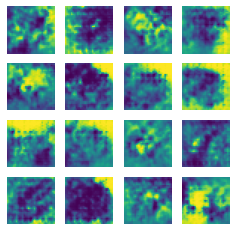

Time for training : 778 sec


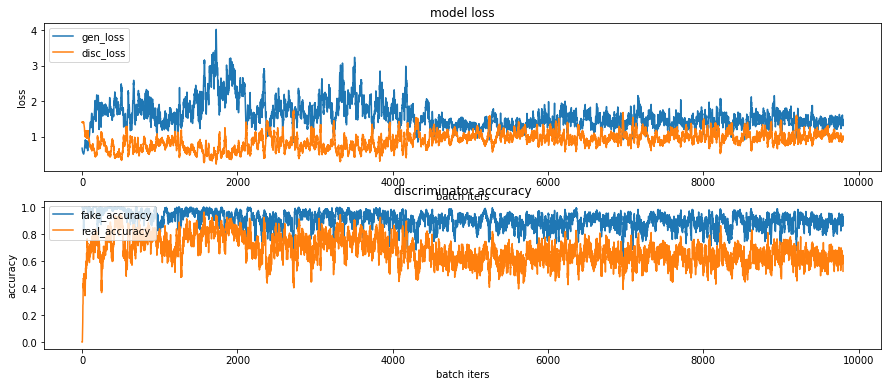

CPU times: user 13min 31s, sys: 1min 20s, total: 14min 51s
Wall time: 12min 59s


In [32]:
%%time
train(train_dataset, EPOCHS, save_every)

# ÌïôÏäµÍ≥ºÏ†ïÏùò loss, accuracy Í∑∏ÎûòÌîÑ Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏù¥ 
# ~/aiffel/dcgan_newimage/fashion2/training_history Í≤ΩÎ°úÏóê ÏÉùÏÑ±
# ÏßÑÌñâ Í≥ºÏ†ïÏùÑ ÏàòÏãúÎ°ú ÌôïÏù∏Ìï¥ Î≥¥Í∏∞

### 8.2 Check the Result

In [2]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/result_cifar10/cifar10_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/result_cifar10/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/result_cifar10/cifar10_dcgan.gif

-rw-r--r-- 1 root root 1339019 Feb 15 09:15 /aiffel/aiffel/dcgan_newimage/result_cifar10/cifar10_dcgan.gif


![Result_Image](https://user-images.githubusercontent.com/97002540/154030732-e473fdd7-3178-469d-b5a1-975f3e9c1a6f.gif)

In [3]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/result_cifar10/graph_cifar10_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/result_cifar10/training_history/train_history*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/result_cifar10/graph_cifar10_dcgan.gif

-rw-r--r-- 1 root root 613942 Feb 15 09:15 /aiffel/aiffel/dcgan_newimage/result_cifar10/graph_cifar10_dcgan.gif


![Result_Graph](https://user-images.githubusercontent.com/97002540/154030787-c2bd121c-b10a-4f5b-9807-d57b4c592380.gif)

### 8.3 Conclusion

* ÏÉùÏÑ±Îêú Ïù¥ÎØ∏ÏßÄÎ•º ÌôïÏù∏ÌñàÏùÑ Ïãú Ïñ¥Îñ§ Í∞ùÏ≤¥Ïù∏ÏßÄ ÌååÏïÖÌï† ÏàòÍ∞Ä ÏóÜÎã§.
* ÎåÄÏ≤¥Ï†ÅÏúºÎ°ú lossÎèÑ ÎÜíÍ≤å ÎÇòÌÉÄÎÇòÎ©∞, accuracyÏùò Í≤ΩÏö∞ 0.5Î°ú ÏàòÎ†¥ÌïòÎäî ÏñëÏÉÅÏùÑ ÌôïÏù∏Ìï† ÏàòÍ∞Ä ÏóÜÎã§.
* Î™®Îç∏ Í∞úÏÑ†Ïù¥ ÌïÑÏöîÌïòÎã§.

### 9. Improving the GAN Training Process

### 9.1 Increase Epochs

* Load the saved training model and train additional 450 epochs.
* Check the results of a total of 500 epochs.

<img src="https://github.com/Min-ju-Kim/E-10.ImageCreation/blob/main/GIF/Attachment1_Image.gif?raw=true">

![Attachment1_Graph](https://user-images.githubusercontent.com/97002540/154026413-fb55c62c-12ba-4fc0-85c4-438754414807.gif)

* Ï†ÅÏùÄ EpochÎ°ú ÌòïÏ≤¥Î•º ÏïåÏïÑÎ≥ºÏàò ÏóÜÎã§.
* `fake_accuracy`Í∞Ä 1Ïóê Í∑ºÏ†ëÌïú Í∞íÏùÑ Í∞ÄÏßÑÎã§.

* Refer to file `Attachment1.ImageCreate_Epoch.ipynb` for detail

### 9.2 Only in Cat Class

* It takes a lot of time to training.
* Training only in cat class.

### 9.2.1 500 Epochs

* Check the results of a total of 500 epochs only in cat class.

![Attachment2_Image](https://user-images.githubusercontent.com/97002540/154026885-509931bb-432f-4e72-83d0-d45278a21c9d.gif)

![Attachment2_Graph](https://user-images.githubusercontent.com/97002540/154026995-be3f6211-5218-4ba7-804e-b4178cdc84a3.gif)

* ÌïôÏäµÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ ÎßéÏù¥ Í±∏Î¶¨ÎØÄÎ°ú cat classÏóê ÎåÄÌï¥ÏÑúÎßå Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±ÏùÑ ÏßÑÌñâÌïúÎã§.
* ÏïÑÏßÅ ÌòïÏ≤¥Î•º ÏïåÏïÑÎ≥º Ïàò ÏóÜÏúºÎ©∞, `fake_accuracy`Í∞Ä 1Ïóê Í∑ºÏ†ëÌïú Í∞íÏùÑ Í∞ÄÏßÑÎã§.

* EpochÎ•º 10Î∞∞ ÎäòÎ†§ ÏßÑÌñâÌñàÎã§.
* ÎùºÏù∏Ïù¥ Ïû°ÌûàÎäî Í≤ÉÏ≤òÎüº Î≥¥Ïù¥ÎÇò, Ïó¨Ï†ÑÌûà ÌòïÏ≤¥Î•º ÏïåÏïÑÎ≥º Ïàò ÏóÜÎã§.
* `fake_accuracy`Í∞Ä Ïó¨Ï†ÑÌûà 1Ïóê Í∑ºÏ†ëÌïú Í∞íÏùÑ Í∞ÄÏßÑÎã§.

* Refer to file `Attachment2.ImageCreate_Cat(500).ipynb` for detail

### 9.2.2 3,000 Epochs

* Load the saved training model and train additional 2500 epochs.
* Check the results of a total of 3000 epochs.

![Attachment3_Image](https://user-images.githubusercontent.com/97002540/154027586-99c1ca57-1d9e-4202-9676-c99c39a1e324.gif)

<img src="https://github.com/Min-ju-Kim/E-10.ImageCreation/blob/main/GIF/Attachment3_Graph.gif?raw=true">

* Ïù¥Ï†Ñ Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄ 2500EpochsÎ•º Ï∂îÍ∞ÄÎ°ú ÏßÑÌñâÌï¥ Ï¥ù 3000EpochsÏùò Í≤∞Í≥ºÎ•º ÌôïÏù∏ÌñàÎã§.
* ÎùºÏù∏Ïù¥ Ïû°ÌòÄÍ∞ÄÎäî Í≤ÉÏù¥ ÌôïÏù∏ÎêúÎã§.
* ÌïòÏßÄÎßå `fake_accuracy`Í∞Ä Ïó¨Ï†ÑÌûà 1Ïóê Í∑ºÏ†ëÌïú Í∞íÏùÑ Í∞ÄÏßÑÎã§.

* Refer to file `Attachment3.ImageCreate_Cat(3000).ipynb` for detail

### 9.2.3 6,000 Epochs

* Load the saved training model and train additional 3000 epochs.
* Check the results of a total of 6000 epochs.

![cifar10_dcgan](https://user-images.githubusercontent.com/97002540/154028050-806671d7-9383-42cc-8a4a-92b5007e58d0.gif)

<img src="https://github.com/Min-ju-Kim/E-10.ImageCreation/blob/main/GIF/Attachment4_Graph.gif?raw=true">

* Ïù¥Ï†Ñ Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄ 3000EpochsÎ•º Ï∂îÍ∞ÄÎ°ú ÏßÑÌñâÌï¥ Ï¥ù 6000EpochsÏùò Í≤∞Í≥ºÎ•º ÌôïÏù∏ÌñàÎã§.
* ÎÇòÎ¶Ñ Í≥†ÏñëÏù¥Ïùò ÌòïÌÉúÍ∞Ä ÌôïÏù∏ÎêúÎã§.
* ÌïòÏßÄÎßå `Fake_accuracy`Í∞Ä Ïó¨Ï†ÑÌûà 1Ïóê Í∑ºÏ†ëÌïú Í∞íÏùÑ Í∞ÄÏßÑÎã§.

* Refer to file `Attachment4.ImageCreate_Cat(6000).ipynb` for detail

### 9.2.4 Modifying Parameters (500 Epochs)

* Improving the GAN training process by modifying parameters
* LeakyReLU : alpha=0.2
* Adam : learning_rate=0.0002, beta_1=0.5
* Generator : ReLU ‚Üí SeLU

![cifar10_dcgan (1)](https://user-images.githubusercontent.com/97002540/154028651-e6f30e8d-7a3b-441d-a0c0-e18a8be35df6.gif)

![graph_cifar10_dcgan (1)](https://user-images.githubusercontent.com/97002540/154028826-79d4e4ad-7982-49cb-9a1f-b0febd4bdd62.gif)

* Ïù¥ÎØ∏ÏßÄÏùò Ï†ïÌôïÌïú ÌôïÏù∏ÏùÑ ÏúÑÌï¥ Ïª¨Îü¨Î°ú Ï∂úÎ†•ÌïòÍ≤å ÎßåÎì§ÏóàÎã§.
* ModelÏùò ParameterÎ•º DCGAN ModelÏùÑ Ï≤òÏùå ÏÑ†Î≥¥Ïù∏ ÎÖºÎ¨∏ ÎÇ¥ÏóêÏÑú Ï†úÏãúÌïú Í∞ÄÏù¥ÎìúÎùºÏù∏ÏúºÎ°ú Ï°∞Ï†ïÌñàÎã§.
* Í≥†ÏñëÏù¥Ïùò ÌòïÌÉúÍ∞Ä Î≥¥Ïù¥Îäî Í≤É Í∞ôÎã§.<br>GIF Í≤∞Í≥º ÌååÏùºÏùÑ Î≥¥Í≥† ÏûàÏúºÎ©¥ Í≥†ÏñëÏù¥Ïùò ÎùºÏù∏Ïù¥ Í∑∏Î†§ÏßÄÎ©∞,ÎπàÏπ∏ÏùÑ Ï±ÑÏõåÎÑ£Ïñ¥ Í∞ÄÎäî ÌòïÏãùÏúºÎ°ú Î™®Îç∏Ïù¥ Ïù¥ÎØ∏ÏßÄÎ•º ÏÉùÏÑ±ÌïúÎã§.
* `fake_accuracy`, `real_accuracy`Î™®Îëê Ïù¥Ï†ÑÏóê ÎπÑÌï¥ 0.5Î°ú ÏàòÎ†¥ÎêòÎäî ÏñëÏÉÅÏù¥ ÌôïÏù∏ÎêúÎã§.
* lossÍ∞Ä ÎÜíÍ≤å ÎÇòÏò§Îäî Í≤ÉÏù¥ ÏÇ¥Ïßù ÏïÑÏâΩÎã§.

* Refer to file `Attachment5.ImageCreate_Cat_Parameter.ipynb` for detail

### 9.2.5 Modifying Parameters (3000 Epochs)

* Load the saved training model and train additional 2500 epochs.
* Check the results of a total of 3000 epochs.

![cifar10_dcgan](https://user-images.githubusercontent.com/97002540/154038431-5888415c-db81-4916-97db-e9d434dfebea.gif)

![graph_cifar10_dcgan](https://user-images.githubusercontent.com/97002540/154038507-81ce5b8d-d39e-4bef-abb9-9650146e53cf.gif)

* Ïù¥Ï†Ñ Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄ 2500EpochsÎ•º Îçî ÏßÑÌñâÌï¥Î≥¥ÏïòÎã§.
* Í≥†ÏñëÏù¥ ÏΩî, Îàà, Í∑Ä Í∞ôÏù¥ ÏÑ∏Î∂ÄÏ†ÅÏù∏ Î∂ÄÎ∂ÑÏùÑ Ï±ÑÏõåÍ∞ÄÎäî ÏñëÏÉÅÏù¥ ÌôïÏù∏ÎêúÎã§.
* `fake_accuracy`, `real_accuracy`ÏóêÎäî ÌÅ∞ Î≥ÄÌôîÎ•º Î≥¥Ïù¥ÏßÄÎäî ÏïäÏïòÏßÄÎßå, EpochÍ∞Ä ÏßÑÌñâÎê®Ïóê Îî∞Îùº `disc_loss`Í∞Ä ÎÇÆÏïÑÏßÄÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

* file `Attachment6.ImageCreate_Cat_Parameter(3000).ipynb` deleted

### 9.2.6 Modifying  the Generator Model (500 Epochs)

* Add an additional layer of generator

![Attachment7_Image](https://user-images.githubusercontent.com/97002540/154029707-81a36885-8298-41e3-8f42-3b15b6a46b4e.gif)

![Attachment7_Graph](https://user-images.githubusercontent.com/97002540/154029742-719c5077-f7e6-4e65-9a1c-77c4664795e9.gif)

* Ïù¥ÎØ∏ÏßÄÎ•º ÏÉùÏÑ±ÌïòÎäî ÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ ÎäêÎ†§ ÏÉùÏÑ±Ïûê Î™®Îç∏Ïùò layerÎ•º ÏåìÏïÑ ÏÉùÏÑ±Ïûê Î™®Îç∏Ïùò CAPAÎ•º ÎÜíÏó¨Î≥¥ÏïòÎã§.
* Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ± ÏãúÍ∞ÑÏù¥ Îã®Ï∂ïÎêòÏßÄÎäî Î™ªÌñàÎã§.
* ÏÉùÏÑ±ÌïòÎäî Í≥†ÏñëÏù¥ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎπÑÏä∑ÌïòÎã§Îäî Ï†êÏóêÏÑú Ïù¥ÎØ∏ÏßÄÏùò ÌíàÏßàÏù¥ ÎÇÆÎã§Í≥† Î≥º Ïàò ÏûàÎã§.
* ÏÉùÏÑ±ÏûêÏôÄ ÌåêÎ≥ÑÏûê Î™®Îç∏Ïùò Í∑†ÌòïÏù¥ ÎßûÏßÄ ÏïäÎäî Í≤ΩÏö∞ ÏÉùÏÑ±ÎêòÎäî Ïù¥ÎØ∏ÏßÄÏùò ÌíàÏßàÏù¥ Í∏âÍ≤©Ìûà ÎÇÆÏïÑÏßêÏùÑ Ïïå Ïàò ÏûàÎã§.

* Refer to file `Attachment7.ImageCreate_Cat_Model.ipynb` for detail

### 9.3 Training CIFAR10 Image

* Try training with the cifar10 image with modifying model.

<img src="https://github.com/Min-ju-Kim/E-10.ImageCreation/blob/main/GIF/Attachment8_Image.gif?raw=true">

![graph_cifar10_dcgan](https://user-images.githubusercontent.com/97002540/154030225-465f7a1e-2196-4d4a-a4ca-f3cc08b6eaf5.gif)

* Í∞ÄÏû• Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º Î≥¥ÏòÄÎçò Î™®Îç∏ÏùÑ CIFAR10Ïóê Ï†ÅÏö©ÏãúÏºúÎ≥¥ÏïòÎã§.
* ÎÑàÎ¨¥ Ï†ÅÏùÄ batch Îã®ÏúÑÎ•º ÏÑ§Ï†ïÌï¥ ÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ Ïò§Îûò Í±∏Î†∏Îã§.
* ÏÑ†Î™ÖÌïòÏßÑ ÏïäÏúºÎÇò, Ïñ¥Îñ§ Î¨ºÏ≤¥Ïù∏ Í≤É Í∞ôÎã§ Ï†ïÎèÑÎ•º ÌåêÎã®Ìï† Ïàò ÏûàÎäî Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎßåÎì§Ïñ¥Ï°åÎã§.
* ÏãúÍ∞ÑÏùÑ Ï°∞Í∏à Îçî Îì§ÏòÄÎã§Î©¥ Î∂ÑÍ∞ÑÏù¥ Í∞ÄÎä•Ìïú Ïù¥ÎØ∏ÏßÄÎ•º ÏñªÏùÑ Ïàò ÏûàÏóàÏùÑ Í≤É Í∞ôÍ∏∞ÎèÑ ÌïòÎã§. 
* ÏãúÍ∞ÑÏù¥ ÏßÄÎÇ†ÏàòÎ°ù Ï†ïÌôïÎèÑÍ∞Ä Ï†êÏ†ê 1Ïóê Í∞ÄÍπåÏõåÏûêÎã§ ÏùºÏ†ï ÏàòÏ§ÄÏóê Ïú†ÏßÄÎêòÎäî Í≤ÉÏù¥ ÌôïÏù∏ÎêúÎã§.
* batch Îã®ÏúÑ Ïô∏ Îã§Î•∏ ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ïÏúºÎ°ú Í∞úÏÑ†Ìï¥ Î≥º Ïàò ÏûàÏùÑ Í≤É Í∞ôÎã§.

* Refer to file `Attachment8.ImageCreate_Cifar10.ipynb` for detail

### 10. Retrospection

### 10.1 What was difficult

* Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±ÎêòÎäîÎç∞ ÎÑà~Î¨¥ ÏãúÍ∞ÑÏù¥ ÎßéÏù¥ Í±∏Î¶∞Îã§.üò• ÌûòÎì§Ïóâ
* GIFÎ•º Îã§Ïãú Ïª¨Îü¨Î°ú Î∞îÍæ∏Îäî Î∞©Î≤ïÏùÑ Ï∞æÎäîÍ≤å ÌûòÎì§ÏóàÎã§.
* Ïó¨Îü¨ ÏãúÎèÑÎ•º Ìï¥Î¥§ÏßÄÎßå ÏÉùÍ∞ÅÎßåÌÅº Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º ÏñªÏßÄ Î™ªÌïú Ï†êÏù¥ Ï¢Ä Ïä¨ÌîÑÎã§.

### 10.2 What I found out

* GANÏóê ÎåÄÌïú Ïó∞Íµ¨Îäî ÍµâÏû•Ìûà ÎßéÏù¥ ÎêòÏñ¥ ÏûàÎäî ÏÉÅÌÉúÎ°ú Ïñ¥Îñ§ ÌååÎùºÎØ∏ÌÑ∞Î•º Ïì∞Î©¥ ÏÑ±Îä•Ïù¥ Í∞úÏÑ†ÎêòÎäîÏßÄÍπåÏßÄÎèÑ ÎÇòÏôÄÏûàÎã§.(Reference 4. Ï∞∏Ï°∞)
* DCGAN ÎÖºÎ¨∏Ïùò Ï†ÄÏûêÎäî `labelÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎã§Î©¥ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÎã§.`ÎùºÍ≥† ÎßêÌïúÎã§.
  * GANÏùÄ Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ÎπÑÏßÄÎèÑÌïôÏäµ Î™®Îç∏Ïù¥ÏßÄÎßå, ÏßÄÎèÑ/ÎπÑÏßÄÎèÑ ÌïôÏäµ Î™®Îç∏(Semi-Supervised Learning)ÏùÑ ÏÑûÏñ¥ÏÑú ÏÇ¨Ïö©Ìï† ÏàòÎèÑ ÏûàÎã§Í≥† ÌïúÎã§.
  * ÏÜåÎüâÏùò Î∂ÑÎ•òÎêú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï¥ Î∂ÑÎ•òÎêòÏßÄ ÏïäÏùÄ Îçî ÌÅ∞ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º Î≥¥Í∞ïÌïòÎäî Î∞©Î≤ïÏù¥Îã§.
* ÌôúÏÑ±ÌôîÌï®Ïàò SELU
$$
SELU(x) = \lambda
\begin{cases}x~~~~~~~~~~~~~~~~~~if~~x~>~0
\\Œ±e^x-Œ±~~~~~~if~~x~‚â§~0
\end{cases}
$$

#### GAN Î™®Îç∏ ÌèâÍ∞Ä ÏßÄÌëú
* **Inception Score(IS)**
  * Î∂ÑÎ•ò Î™®Îç∏Ïóê Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•Ìï† Í≤ΩÏö∞ ÎÜíÏùÄ ÌôïÎ•†Î°ú ÌÅ¥ÎûòÏä§Î•º ÏòàÏ∏°ÌïúÎã§Î©¥ ÏÉùÏÑ± Ïù¥ÎØ∏ÏßÄ(Fake)ÏôÄ Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄ(Real)ÏôÄ ÎπÑÏä∑ÌïòÎã§ Ìï† Ïàò ÏûàÎã§. Ïù¥Îäî p(y|x)Î°ú Ï∏°Ï†ïÏù¥ Í∞ÄÎä•ÌïòÎã§. Í∑∏Î¶¨Í≥† p(y|x)ÏóêÏÑú xÎ°ú Ï†ÅÎ∂ÑÌïú p(y)Í∞Ä ÌèâÎì±Ìïú Î∂ÑÌè¨ÎùºÎ©¥ ÏÉùÏÑ±Îêú Ïù¥ÎØ∏ÏßÄÍ∞Ä Îã§ÏñëÏÑ±ÏùÑ Í∞ñÍ≥† ÏûàÎã§ ÎßêÌï† Ïàò ÏûàÎã§. Ïù¥Îü¨Ìïú Îëê Í∞ÄÏßÄ Í¥ÄÏ†êÏúºÎ°ú ÏÉùÏÑ±Îêú Ïù¥ÎØ∏ÏßÄ(Fake)Î•º ÌèâÍ∞ÄÌïòÎäî Í≤É
  * ÌïòÏßÄÎßå Ïù¥Îü¨Ìïú ISÏùò Í≤ΩÏö∞ ÏÉùÏÑ±Îêú(Fake) Ïù¥ÎØ∏ÏßÄÎßå ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄÏôÄ ÎπÑÍµêÌïòÏßÄ Î™ªÌïúÎã§Îäî Îã®Ï†êÏù¥ ÏûàÎã§.
  

* **Frechet Inception Distance (FID)**
  * ISÏùò Îã®Ï†êÏùÑ Í∞úÏÑ†ÌïòÍ∏∞ ÏúÑÌï¥ Í≥†ÏïàÎêú ÏßÄÌëúÎ°ú, Îëê Î∂ÑÌè¨ ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º Ï∏°Ï†ïÌïòÎäîÎç∞ ÏÇ¨Ïö©ÎêòÎäî Î∞©Î≤ï
    * Î∂ÑÎ•ò Î™®Îç∏Ïóê Îî∞Îùº Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄÏôÄ ÏÉùÏÑ±Îêú Ïù¥ÎØ∏ÏßÄÏùò ÌäπÏßïÎüâÏùÑ Ï∂îÏ∂úÌïúÎã§.
    * ÌäπÏßïÎüâÏù¥ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§ Í∞ÄÏ†ï ÌõÑ Í∑∏ Î∂ÑÌè¨ ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º Ï∏°Ï†ïÌïúÎã§.
  * inception ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò Ï§ëÍ∞Ñ layerÏóêÏÑú featureÎ•º Ï∂îÏ∂úÌïòÍ≥† featureÏóêÏÑú ÌèâÍ∑†Í≥º Í≥µÎ∂ÑÏÇ∞ÏùÑ Ï∂îÏ∂úÌïòÍ≥† Í≥ÑÏÇ∞ÌïúÎã§.
  * FID Í∞íÏù¥ ÎÇÆÏúºÎ©¥ Real/FakeÍ∞Ä Ïú†ÏÇ¨ÌïòÎã§Í≥† ÌåêÎã®ÌïúÎã§.
  * Îã®Ï†êÏùÄ ÌëúÎ≥∏Ïùò Î∂ÑÌè¨Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Í∞Ä ÏïÑÎãê Í≤ΩÏö∞ Ï†úÌïúÏ†ÅÏù∏ ÌÜµÍ≥ÑÎüâ(ÌèâÍ∑†, Î∂ÑÏÇ∞)ÎßåÏúºÎ°úÎäî Î∂ÑÌè¨Ïùò Ï∞®Ïù¥Î•º ÏûòÎ™ª ÏÑ§Î™ÖÌï† Ïàò ÏûàÎã§Îäî Ï†êÏù¥ ÏûàÎã§.

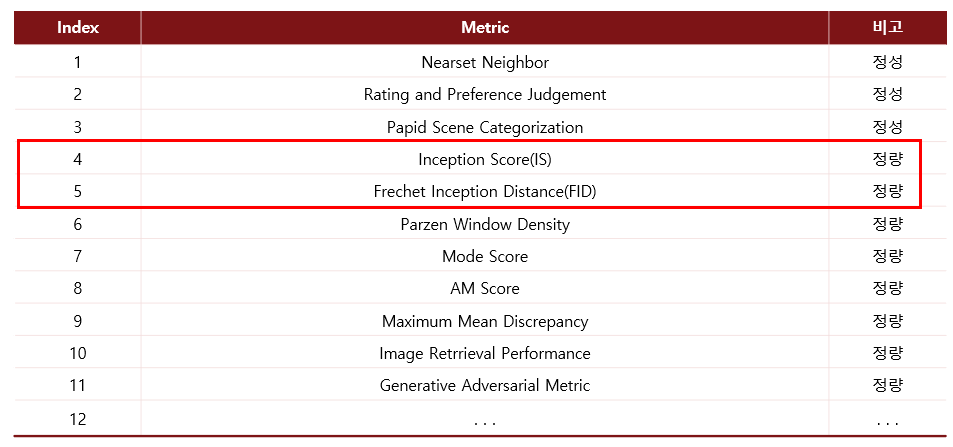
<center>[Img6] Summary of Quantitative GAN Generator Evaluation Methods</center>

### 10.3 What I want to know more about

* DiscriminatorÍ∞Ä ÌïôÏäµÌïú featureÏùò Ïñ¥Îñ§ Î∂ÄÎ∂ÑÏùÑ activeÌïòÍ≤å ÌïòÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Îäî Í≤É
* Ïã§Ï†úÎ°ú Ï∂úÎ†•Ìï¥ ÌôïÏù∏Ìï¥Î≥º Ïàò ÏûàÎã§Í≥† ÌïúÎã§. Í≥†ÏñëÏù¥Ïùò Ïñ¥Îñ§ Î∂ÄÎ∂ÑÏùÑ activeÌïòÍ≤å ÌïòÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Î©¥ Ïû¨Î∞åÏùÑ ÎìØÌïòÎã§.
* https://codebaragi23.github.io/books/DeepLearningFromKeras/Part2/Chapter5/5.4/
* https://velog.io/@sjinu/%EA%B0%9C%EB%85%90%EC%A0%95%EB%A6%AC-Filter-Visualization%ED%95%84%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94

### 10.4 Self-Resolution

* Î™®Îç∏Ïù¥ Í∞ÄÎ•¥Ï≥êÏ£ºÏßÄ ÏïäÏïÑÎèÑ Ïä§Ïä§Î°ú ÌïôÏäµÏùÑ ÌïòÎ©¥ÏÑú Ïù¥ÎØ∏ÏßÄÎ•º ÏÉùÏÑ±ÌïòÎäî Í≤ÉÏù¥ Ïã†Í∏∞ÌïòÍ≤å ÎäêÍª¥Ï°åÎã§. 
* ÏùºÎ∞òÏ†ÅÏúºÎ°ú Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÎÜíÏó¨Ï§ÄÎã§Îäî ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ïÍ∞íÏùÑ Í∞ÄÏ†∏Îã§ ÏÇ¨Ïö©ÌïúÎã§Í≥† ÌïòÎçîÎùºÎèÑ Îç∞Ïù¥ÌÑ∞Ïóê Îî∞ÎùºÏÑú Îã¨ÎùºÏßà Ïàò ÏûàÎã§Îäî Í≤ÉÏùÑ ÏïåÍ≤åÎêòÏóàÎã§.
* Í≥µÎ∂ÄÌï†Í≤å ÎÑòÏ≥êÎÇòÎäîÍµ¨ÎÇòüòÖ

**[References]**

1. GAN, DCGANÏù¥ÎûÄ?
* https://roytravel.tistory.com/109
2. DCGAN ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï Í∑ºÍ±∞
* https://kdeon.tistory.com/60?category=941837
* https://flonelin.wordpress.com/2020/05/20/%EC%95%88%EC%A0%95%EC%A0%81%EC%9D%B8-generative-adversarial-network-%ED%8A%B8%EB%A0%88%EC%9D%B4%EB%8B%9D%EC%9D%84-%EC%9C%84%ED%95%9C-%ED%8C%81%EB%93%A4/
3. GAN Î™®Îç∏ Í≤∞Í≥º Ìï¥ÏÑù Î∞©Î≤ï
* https://machinelearningmastery.com/practical-guide-to-gan-failure-modes/
4. GAN ÎÖºÎ¨∏
* https://arxiv.org/pdf/1511.06434.pdf
* https://arxiv.org/pdf/1406.2661.pdf
5. GAN Î™®Îç∏ ÌèâÍ∞Ä
* https://wikidocs.net/149481
* https://roytravel.tistory.com/109
* https://machinelearningmastery.com/how-to-implement-the-frechet-inception-distance-fid-from-scratch/
6. ÎπÑÏßÄÎèÑ ÌïôÏäµ
* https://ebbnflow.tistory.com/165
7. ÌôúÏÑ±ÌôîÌï®Ïàò
* https://mlfromscratch.com/activation-functions-explained/#/

**[Attachments]**

* Attachment1.ImageCreate_Epoch.ipynb
* Attachment2.ImageCreate_Cat(500).ipynb
* Attachment3.ImageCreate_Cat(3000).ipynb
* Attachment4.ImageCreate_Cat(6000).ipynb
* Attachment5.ImageCreate_Cat_Parameter.ipynb
* Attachment6.ImageCreate_Cat_Parameter(3000).ipynb (deleted) :-(
* Attachment7.ImageCreate_Cat_Model.ipynb
* Attachment8.ImageCreate_Cifar10.ipynb